In [7]:
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [8]:
#Read the data
#df12=pd.read_csv('news.csv')
df1=pd.read_csv("True.csv")
df2=pd.read_csv('Fake.csv')
df12=pd.concat([df1,df2], ignore_index=True)
#Get shape and head
#df.shape
#df.head()
#importing data in csv #df.to_csv("pranav.csv",index=False)
#print(df.shape[0],df.shape[1],"row and columns",df.shape)
df12.to_csv("pranav.csv",index=False)

In [9]:
#DataFlair - Get the labels
labels=df12.label
labels.head()
#df.tail()


0    REAL
1    REAL
2    REAL
3    REAL
4    REAL
Name: label, dtype: object

In [13]:
#DataFlair - Split the dataset
x_train,x_test,y_train,y_test=train_test_split(df12['text'], labels, test_size=0.2,random_state=10)
print(len(x_train),len(x_test))
#x_test="AMITAbh bachchan is a cricket player"
#y_test="FALSE"
#print(x_train.shape)
#print(y_train.shape)
#print(x_test.shape)
#print(y_test.shape)
#x_test=["biggest",
 #      'frenquetly']
#type(x_train.iloc[0])
y_test


35866 8967


35951    FAKE
33123    FAKE
1893     REAL
17524    REAL
44421    FAKE
         ... 
24725    FAKE
24887    FAKE
12132    REAL
40218    FAKE
11672    REAL
Name: label, Length: 8967, dtype: object

In [11]:
#DataFlair - Initialize a TfidfVectorizer

tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)
#tfidf_vectorizer.fit_transform(x_train.values.astype('U'))
#tfidf_vectorizer.fit_transform(x_train.values.astype('U'))
#DataFlair - Fit and transform train set, transform test set
tfidf_train=tfidf_vectorizer.fit_transform(x_train)
tfidf_test=tfidf_vectorizer.transform(x_test)
#print(tfidf_train.shape)
#print(tfidf_test.shape)
#print(tfidf_test)
#print(tfidf_test.toarray())
#print(tfidf_vectorizer.get_feature_names())

In [12]:
#DataFlair - Initialize a PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)
#print(len(tfidf_train))
#DataFlair - Predict on the test set and calculate accuracy
y_pred=pac.predict(tfidf_test)
#print(y_pred,y_test)
matrix = confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])
#
y_test

35951    FAKE
33123    FAKE
1893     REAL
17524    REAL
44421    FAKE
         ... 
24725    FAKE
24887    FAKE
12132    REAL
40218    FAKE
11672    REAL
Name: label, Length: 8967, dtype: object

In [10]:
score=accuracy_score(y_test,y_pred)
print(score*100)
#print(y_test)

99.52046392327422


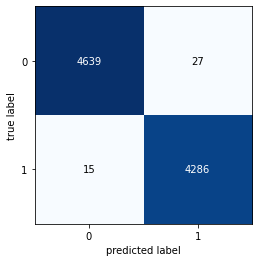

In [8]:
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

fig, ax = plot_confusion_matrix(conf_mat=matrix)
plt.show()
#TP FN
#FP TN

In [9]:
precision = matrix[0][0] / (matrix[0][0]+matrix[1][0])
print("Precision=",precision*100)
recall= matrix[0][0] / (matrix[0][0]+matrix[0][1])
print("Recall=",recall*100)
f_measure = (2*precision*recall) / (precision + recall)
print("F-Measure=",f_measure*100)

Precision= 99.6776966050709
Recall= 99.42134590655807
F-Measure= 99.54935622317598
